## **In this practice exercise, we will be applying different Supervised and Unsupervised models for Sentiment Analysis on the IMDB movie review dataset.**

-         Movie reviews help users decide whether a movie is worth watching or not. A summary of the reviews for a movie can help a user make quick decisions within a small period of time, rather than spending much more time reading multiple reviews for a movie. Sentiment analysis helps in rating how positive or negative a movie review is. Therefore, the process of understanding if a review is positive or negative can be automated as the machine learns different techniques from the domain of Natural Language Processing.

1. **Supervised models** - Some popular techniques used for encoding text:
    *           **Bag of Words**
    *           **TF-IDF** (**T**erm  **F**requency - **I**nverse **D**ocument **F**requency)
2. **Unsupervised models** - Some popular techniques used for unsupervised Sentiment Analysis:       
    *           **TextBlob**         
    *           **VADER Sentiment**

## **Importing the libraries**

In [ ]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score      

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sriharsha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sriharsha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


You should consider upgrading via the '/Users/sriharsha/anaconda3/envs/tf/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sriharsha/anaconda3/envs/tf/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/sriharsha/anaconda3/envs/tf/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Loading data into pandas dataframe
data = pd.read_csv("imdb_10K_sentimnets_reviews.csv")

In [ ]:
data.head()

,review,sentiment
0,"Okay, I know this does'nt project India in a g...",1
1,Despite John Travolta's statements in intervie...,0
2,"I am a kung fu fan, but not a Woo fan. I have ...",1
3,He seems to be a control freak. I have heard h...,0
4,"Admittedly, there are some scenes in this movi...",1


* Here, a sentiment value of **0 is negative**, while **1 represents a positive sentiment.**

## **Exploratory Data Analysis (EDA)**

In [ ]:
data.shape               # print shape of data.

(10000, 2)

In [ ]:
data.isnull().sum(axis=0)          # Check for NULL values.

review       0
sentiment    0
dtype: int64

### **Word Cloud for Negative Reviews**

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
#creating word cloud for negative reviews
negative_reviews=data[data['sentiment']==0]
words = ' '.join(negative_reviews['review'])
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

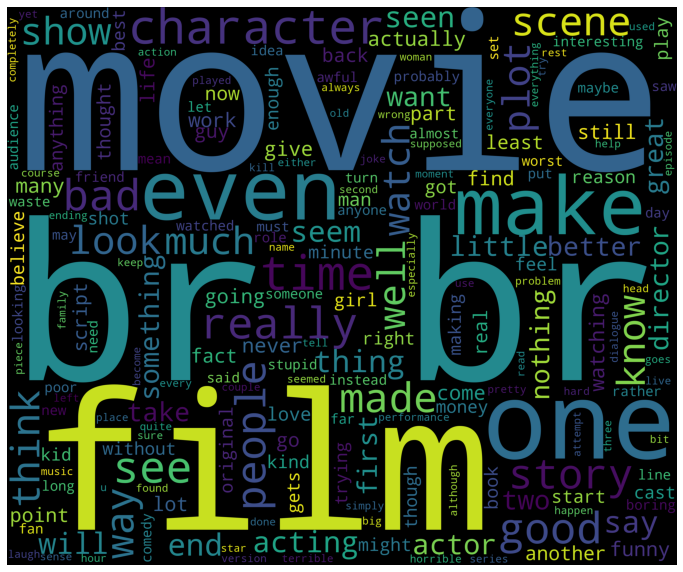

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* **even, bad, never, little, least, maybe, instead, waste, terrible, still, boring** were some of the important recurring words observed in the negative reviews

### **Word Cloud for Positive Reviews**

In [ ]:
#creating word cloud for positive reviews
positive_reviews=data[data['sentiment']==1]
words = ' '.join(positive_reviews['review'])
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

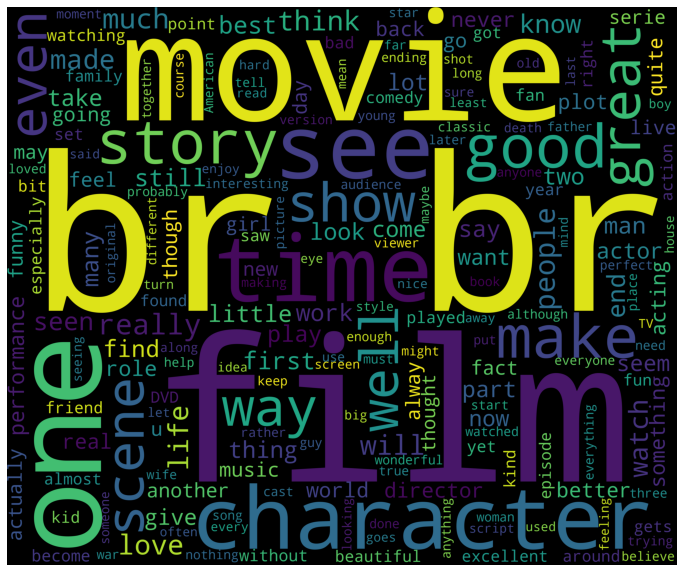

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* **well, good, best, great, enjoy, interesting, wonderful, much, fun, beautiful, fun** were some of the important words observed in the positive reviews

In [ ]:
data['sentiment'].unique()         #check the labels

array([1, 0])

In [ ]:
data['sentiment'].value_counts()     # check the count of each labels

1    5037
0    4963
Name: sentiment, dtype: int64

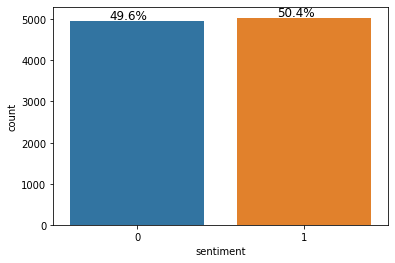

In [ ]:
#plot the distribution of the class label
def bar_plot(data, feature):
    plot = sns.countplot(x =feature, data = data)
    total = len(data)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")
    plt.show()
    
bar_plot(data,'sentiment')

## **Data Pre-processing**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.
- Remove numbers.
- Tokenization.
- Remove Stopwords.
- Lemmatized data.
- We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [ ]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
data['review'] = data['review'].apply(lambda x: clean_text(x))
data.head()

,review,sentiment
0,"Okay, I know this does'nt project India in a g...",1
1,Despite John Travolta's statements in intervie...,0
2,"I am a kung fu fan, but not a Woo fan. I have ...",1
3,He seems to be a control freak. I have heard h...,0
4,"Admittedly, there are some scenes in this movi...",1


In [ ]:
data['review'] = data.apply(lambda row: nltk.word_tokenize(row['review']), axis=1) # Tokenization of data
data.head()

,review,sentiment
0,"[Okay, ,, I, know, this, does'nt, project, Ind...",1
1,"[Despite, John, Travolta, 's, statements, in, ...",0
2,"[I, am, a, kung, fu, fan, ,, but, not, a, Woo,...",1
3,"[He, seems, to, be, a, control, freak, ., I, h...",0
4,"[Admittedly, ,, there, are, some, scenes, in, ...",1


In [ ]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

#data['review'] = data['review'].astype(str)
data['review'] = data.apply(lambda row: normalize(row['review']), axis=1)

In [ ]:
data.head()

,review,sentiment
0,okay know doesnt project india good light over...,1
1,despite john travolta statements interview fav...,0
2,kung fu fan woo fan interest gangster movies f...,1
3,seem control freak hear comment lose control s...,0
4,admittedly scenes movie seem little unrealisti...,1


## **Supervised Learning for Sentiment Analysis**

### **Bag of Words (CountVectorizer)**
      
In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are **d** unique words in our dictionary then for every review the vector will be of length **d** and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.


In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['review'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [ ]:
data_features.shape       #Shape of the feature vector

(10000, 500)

In [ ]:
X = data_features

y = data.sentiment

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

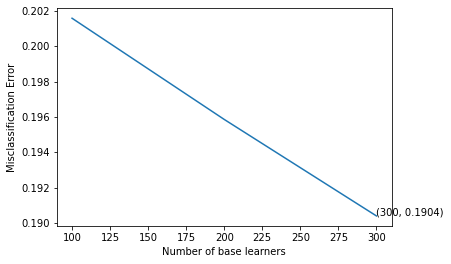

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1224
           1       0.82      0.81      0.82      1276

    accuracy                           0.81      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.81      0.81      0.81      2500

Accuracy of the model is :  0.8128


[[ 998  226]
 [ 242 1034]]


<AxesSubplot:>

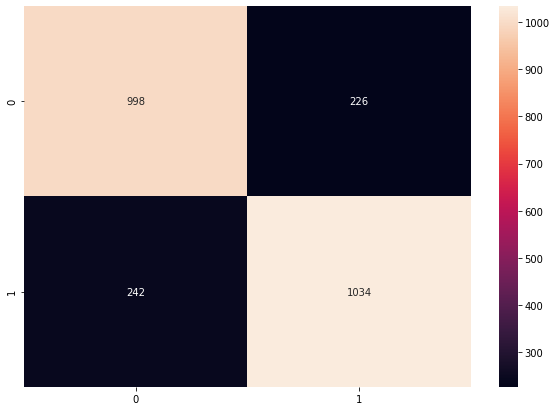

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

bad,worst,waste,great,awful,love,nothing,excellent,terrible,best,bore,worse,movie,horrible,stupid,poor,film,suppose,see,could,one,wonderful,annoy,perfect,like,even,make,get,plot,would,act,also,time,thing,good,well,life,try,show,script,
 
 


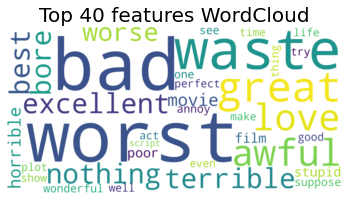

In [ ]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **TF-IDF**

**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(data['review'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(10000, 500)

In [ ]:
X = data_features

y = data.sentiment

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

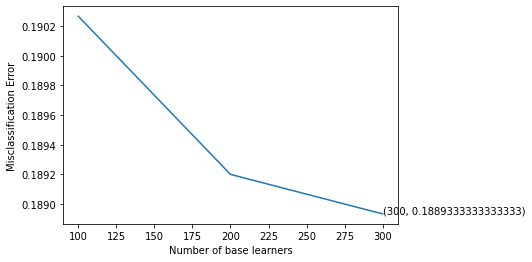

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1224
           1       0.83      0.82      0.82      1276

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500

Accuracy of the model is :  0.8212


[[1001  223]
 [ 224 1052]]


<AxesSubplot:>

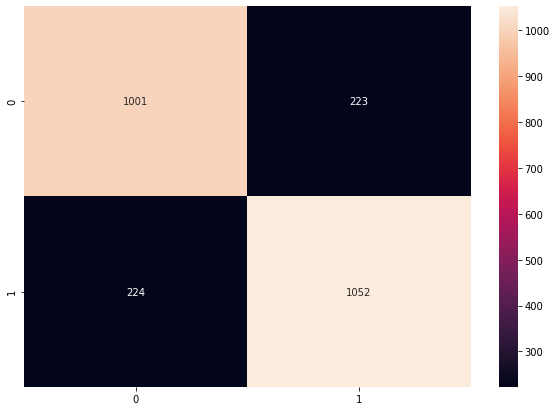

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

bad, worst, waste, great, awful, love, nothing, best, bore, excellent, terrible, worse, horrible, poor, stupid, suppose, movie, could, even, see, film, would, wonderful, make, plot, act, one, annoy, like, perfect, thing, get, well, script, seem, try, say, time, also, good, 
 
 


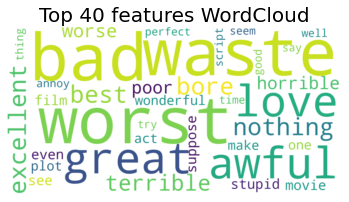

In [ ]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## **Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF**

In [ ]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,1


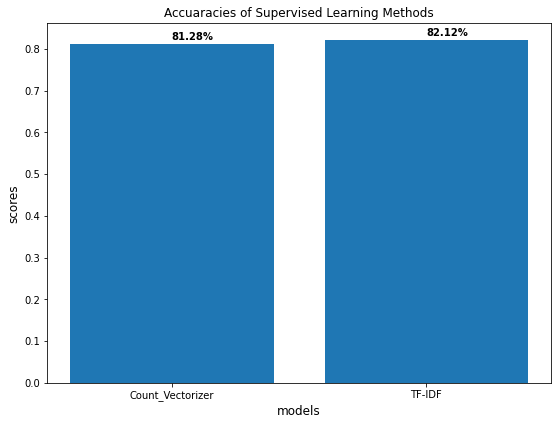

In [ ]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

* **TF-IDF shows a better performance than Count Vectorizer**, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

## **Unsupervised Learning methods for Sentiment Analysis**

## **VADER**
**VADER (Valence Aware Dictionary and Sentiment Reasoner)** is a lexicon and rule-based sentiment analysis tool. VADER not only tells us about the Positivity and Negativity score, but also tells us **how** positive or negative a sentiment is.

In [ ]:
import nltk
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sriharsha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data_new = data.copy()   #make a copy of dataframe and do unsupervised operations on that dataframe

In [ ]:
#Calculate the polarity score of the reviews
data_new['scores'] = data_new['review'].apply(lambda review: sentiment.polarity_scores(review))

data_new.head()

,review,sentiment,scores
0,okay know doesnt project india good light over...,1,"{'neg': 0.197, 'neu': 0.558, 'pos': 0.245, 'co..."
1,despite john travolta statements interview fav...,0,"{'neg': 0.075, 'neu': 0.651, 'pos': 0.274, 'co..."
2,kung fu fan woo fan interest gangster movies f...,1,"{'neg': 0.258, 'neu': 0.442, 'pos': 0.3, 'comp..."
3,seem control freak hear comment lose control s...,0,"{'neg': 0.165, 'neu': 0.677, 'pos': 0.158, 'co..."
4,admittedly scenes movie seem little unrealisti...,1,"{'neg': 0.106, 'neu': 0.69, 'pos': 0.203, 'com..."


In [ ]:
#Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head()

,review,sentiment,scores,compound
0,okay know doesnt project india good light over...,1,"{'neg': 0.197, 'neu': 0.558, 'pos': 0.245, 'co...",0.3806
1,despite john travolta statements interview fav...,0,"{'neg': 0.075, 'neu': 0.651, 'pos': 0.274, 'co...",0.9894
2,kung fu fan woo fan interest gangster movies f...,1,"{'neg': 0.258, 'neu': 0.442, 'pos': 0.3, 'comp...",0.4913
3,seem control freak hear comment lose control s...,0,"{'neg': 0.165, 'neu': 0.677, 'pos': 0.158, 'co...",-0.1531
4,admittedly scenes movie seem little unrealisti...,1,"{'neg': 0.106, 'neu': 0.69, 'pos': 0.203, 'com...",0.9347


In [ ]:
#Classify the class of the review by keeping threshold on the compund score
data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,review,sentiment,scores,compound,comp_score
0,okay know doesnt project india good light over...,1,"{'neg': 0.197, 'neu': 0.558, 'pos': 0.245, 'co...",0.3806,1
1,despite john travolta statements interview fav...,0,"{'neg': 0.075, 'neu': 0.651, 'pos': 0.274, 'co...",0.9894,1
2,kung fu fan woo fan interest gangster movies f...,1,"{'neg': 0.258, 'neu': 0.442, 'pos': 0.3, 'comp...",0.4913,1
3,seem control freak hear comment lose control s...,0,"{'neg': 0.165, 'neu': 0.677, 'pos': 0.158, 'co...",-0.1531,0
4,admittedly scenes movie seem little unrealisti...,1,"{'neg': 0.106, 'neu': 0.69, 'pos': 0.203, 'com...",0.9347,1


In [ ]:
data["VADER_pred"] = data_new['comp_score'].tolist()
data.head()

,review,sentiment,VADER_pred
0,okay know doesnt project india good light over...,1,1
1,despite john travolta statements interview fav...,0,1
2,kung fu fan woo fan interest gangster movies f...,1,1
3,seem control freak hear comment lose control s...,0,0
4,admittedly scenes movie seem little unrealisti...,1,1


In [ ]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["sentiment"] = data["sentiment"].astype(int)   #convert the sentiment column values into int data type
data["VADER_pred"] = data["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type
print("Accuaracy using Vader Sentiment Analysis is : ",
      accuracy_score(data["sentiment"].tolist(),data["VADER_pred"].tolist()))

Accuaracy of using Vader Sentiment Analysis is :  0.6715


[[2325 2638]
 [ 647 4390]]


<AxesSubplot:>

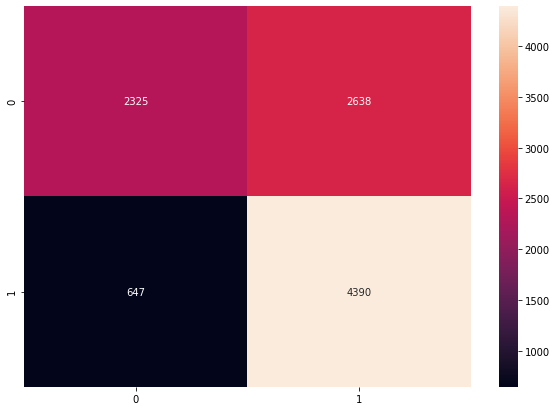

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["sentiment"].tolist(), data['VADER_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### Wi`th the help of the TextBlob.sentiment() method, **we can get the sentiments of the sentences by using TextBlob.sentiment() method.**

## **TextBlob**

In [ ]:
from textblob import TextBlob

In [ ]:
data_new = data.copy()      #make a copy of dataframe and do unsupervised operations on that dataframe

In [ ]:
#Calculate the polarity score of the reviews
data_new['polarity']  = data_new['review'].apply(lambda review: TextBlob(review).sentiment.polarity)

data_new.head()

,review,sentiment,VADER_pred,polarity
0,okay know doesnt project india good light over...,1,1,0.215851
1,despite john travolta statements interview fav...,0,1,0.190805
2,kung fu fan woo fan interest gangster movies f...,1,1,0.160546
3,seem control freak hear comment lose control s...,0,0,-0.095960
4,admittedly scenes movie seem little unrealisti...,1,1,0.121566


In [ ]:
#Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,review,sentiment,VADER_pred,polarity,polarity_score
0,okay know doesnt project india good light over...,1,1,0.215851,1
1,despite john travolta statements interview fav...,0,1,0.190805,1
2,kung fu fan woo fan interest gangster movies f...,1,1,0.160546,1
3,seem control freak hear comment lose control s...,0,0,-0.095960,0
4,admittedly scenes movie seem little unrealisti...,1,1,0.121566,1


In [ ]:
data["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data.head()

,review,sentiment,VADER_pred,Text_Blob_pred
0,okay know doesnt project india good light over...,1,1,1
1,despite john travolta statements interview fav...,0,1,1
2,kung fu fan woo fan interest gangster movies f...,1,1,1
3,seem control freak hear comment lose control s...,0,0,0
4,admittedly scenes movie seem little unrealisti...,1,1,1


In [ ]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["sentiment"] = data["sentiment"].astype(int)  #convert the sentiment column values into int data type
data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type
print("Accuaracy of using Text Blob Sentiment Analysis is : ",
      accuracy_score(data["sentiment"].tolist(),data["Text_Blob_pred"].tolist()))

Accuaracy of using Text Blob Sentiment Analysis is :  0.6856


[[2160 2803]
 [ 341 4696]]


<AxesSubplot:>

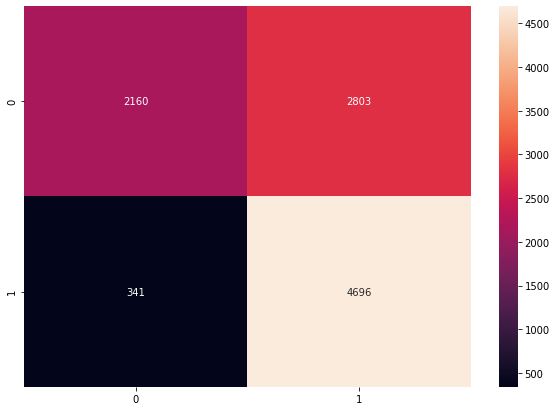

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["sentiment"].tolist(), data['Text_Blob_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## **Comparing the accuracies of Unsupervised Learning methods VADER and TextBlob**

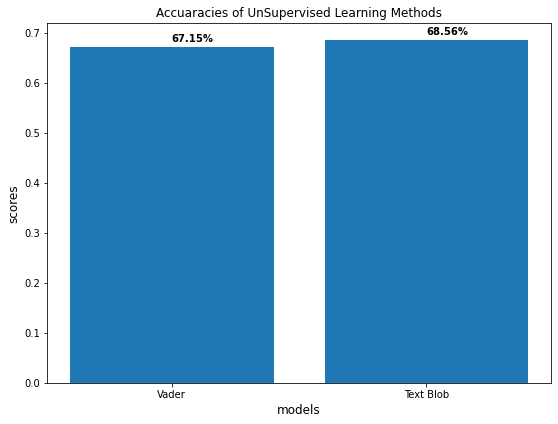

In [ ]:
#plot the accuaracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(data["sentiment"].tolist(),data["VADER_pred"].tolist()),accuracy_score(data["sentiment"].tolist(),data["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #tittle of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

- **Here, Text Blob works better than Vader because VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage.**

# **Conclusions**
#### The below are the takeaway points from the above case study
- Exploratory Data Analysis.
- Text preprocessing methods.
- Working on Encoding text data using Count Vectorizer and TF-IDF and  classifying them using Machine learning models.
- Working on Unsupervised learning methods using Python packages for Sentiment Analysis like VADER sentiment analysis and TextBlob.
- Comparing the Machine learning models' performance with Sentiment Analysis using Python packages to check which one gave better and more accurate results.
 